# Air Quality Data analysis

Here, I have plotted and analysed the satellite-derived PM2.5 data for India. The data has a resolution of $0.1\degree \times 0.1\degree$. The dataset that I have used is provided by the [Atmospheric Composition Analysis Group](https://sites.wustl.edu/acag/datasets/surface-pm2-5/) and 
is available here: https://wustl.app.box.com/v/ACAG-V5GL04-GWRPM25c0p10/folder/237168822060

## Collecting and formatting the data

While the provided data encompasses all of Asia, here I'm specifically extracting information relevant to India.  I use the `reverse_geocode` library to check if a given cell lies in India after trimming the dataset. However, this still takes a lot of time to compute, so I have saved all the data in the `formatted_monthly` directory. 

In [1]:
import numpy as np
import netCDF4
import reverse_geocode

initial_year = 1998
initial_month = str(1).zfill(2)
fp=f'monthly/V5GL04.HybridPM25c_0p10.Asia.{initial_year}{initial_month}-{initial_year}{initial_month}.nc'
nc = netCDF4.Dataset(fp)

lat = np.round(nc.variables["lat"], 2)
lon = np.round(nc.variables["lon"], 2)

lat_mask = (lat > 8.06666667) & (lat < 37.1) # latitude of India
lon_mask = (lon > 68.1166667) & (lon < 97.4166667) # longitude of India

lat = lat[lat_mask]
lon = lon[lon_mask]

nc.close()

def read_and_format_data(file_idx):
    year = 1998 + int(file_idx/12)
    month = str(file_idx % 12 + 1).zfill(2)
    fp=f'monthly/V5GL04.HybridPM25c_0p10.Asia.{year}{month}-{year}{month}.nc'
    nc = netCDF4.Dataset(fp)
    data = nc.variables["GWRPM25"][lat_mask, lon_mask]

    for i, _lat in enumerate(lat):
        for j, _lon in enumerate(lon):
            coords = (_lat, _lon),
            obj = reverse_geocode.search(coords)
            if obj[0]['country'] != 'India':
                data[i][j] = np.nan

    nc.close()
    return data

for i in range(300):
    print(f'Writing file {i} of 300')
    
    ncfile = netCDF4.Dataset(f'formatted_monthly/{i}.nc', mode='w', format='NETCDF4_CLASSIC')
    
    lat_dim = ncfile.createDimension('lat', len(lat))     # latitude axis
    lon_dim = ncfile.createDimension('lon', len(lon))    # longitude axis
    
    lat_var = ncfile.createVariable('lat', np.float64, ('lat',))
    lat_var.units = 'degrees_north'
    lat_var.long_name = 'latitude'
    
    lon_var = ncfile.createVariable('lon', np.float64, ('lon',))
    lon_var.units = 'degrees_east'
    lon_var.long_name = 'longitude'
    
    GWRPM25 = ncfile.createVariable('GWRPM25', np.float32, ('lat','lon')) 
    
    lat_var[:] = lat
    lon_var[:] = lon
    GWRPM25[:,:] = read_and_format_data(i)
    
    ncfile.close()

print("Done!")

Writing file 0 of 300
Writing file 1 of 300
Writing file 2 of 300
Writing file 3 of 300
Writing file 4 of 300
Writing file 5 of 300
Writing file 6 of 300
Writing file 7 of 300
Writing file 8 of 300
Writing file 9 of 300
Writing file 10 of 300
Writing file 11 of 300
Writing file 12 of 300
Writing file 13 of 300
Writing file 14 of 300
Writing file 15 of 300
Writing file 16 of 300
Writing file 17 of 300
Writing file 18 of 300
Writing file 19 of 300
Writing file 20 of 300
Writing file 21 of 300
Writing file 22 of 300
Writing file 23 of 300
Writing file 24 of 300
Writing file 25 of 300
Writing file 26 of 300
Writing file 27 of 300
Writing file 28 of 300
Writing file 29 of 300
Writing file 30 of 300
Writing file 31 of 300
Writing file 32 of 300
Writing file 33 of 300
Writing file 34 of 300
Writing file 35 of 300
Writing file 36 of 300


KeyboardInterrupt: 

## Video Animation of the Air quality snapshots
Here is a video animation of the air quality snapshots of India over the time period of 1998-2022. Here, I have used the non-formatted data. However, to use the formatted data, you can change the directory of the variable `fp` from `monthly` to `monthly_formatted` at the two places.

In [16]:
%matplotlib tk

from matplotlib import pyplot as plt
import netCDF4
import numpy as np
import matplotlib.animation as animation

year = 1998
month = str(1).zfill(2)
fp=f'monthly/V5GL04.HybridPM25c_0p10.Asia.{year}{month}-{year}{month}.nc'
# fp=f'formatted_monthly/{0}.nc' # <-- Uncomment this if you want to see only India's data
nc = netCDF4.Dataset(fp)

lat = np.round(nc.variables["lat"], 2)
lon = np.round(nc.variables["lon"], 2)

lat_mask = (lat > 8.06666667) & (lat < 37.1) # latitude of india
lon_mask = (lon > 68.1166667) & (lon < 97.4166667) # longitude of india

lat_step_size = 50
lon_step_size = 50

lat = lat[lat_mask]
lon = lon[lon_mask]
data = nc.variables["GWRPM25"][lat_mask, lon_mask]
nc.close()

scale = 1/40
frames = 300
interval = 100

fig = plt.figure(figsize=(data.shape[0]*scale, data.shape[1]*scale))
im = plt.imshow(data, vmin=0, vmax=200)

plt.ylim(bottom=0, top=len(data))
plt.yticks(np.arange(0, data.shape[0], lat_step_size), labels=lat[::lat_step_size])
plt.xticks(np.arange(0, data.shape[1], lon_step_size), labels=lon[::lon_step_size], rotation=45)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title(f"PM2.5 Monthly Mean [ug/m3]: Year {1998} Month {1}", fontsize=16)
plt.colorbar()
plt.tight_layout()

def animation_fn(frame):
    year = 1998 + int(frame/12)
    month = str(frame % 12 + 1).zfill(2)
    fp=f'monthly/V5GL04.HybridPM25c_0p10.Asia.{year}{month}-{year}{month}.nc'
    # fp=f"formatted_monthly/{frame}.nc" # <-- Uncomment this if you want to see only India's data
    nc = netCDF4.Dataset(fp)

    im.set_array(nc.variables["GWRPM25"][lat_mask, lon_mask])
    im.axes.set_title(f"PM2.5 Monthly Mean [ug/m3]: Year {year} Month {int(month)}", fontsize=16)
    nc.close()
    
    return [im]

anim = animation.FuncAnimation(fig, animation_fn, frames=frames, interval=interval)
plt.show()

## Monthly Average PM2.5 in India
The graph below shows the monthly average PM2.5 in India. It has a periodic nature.

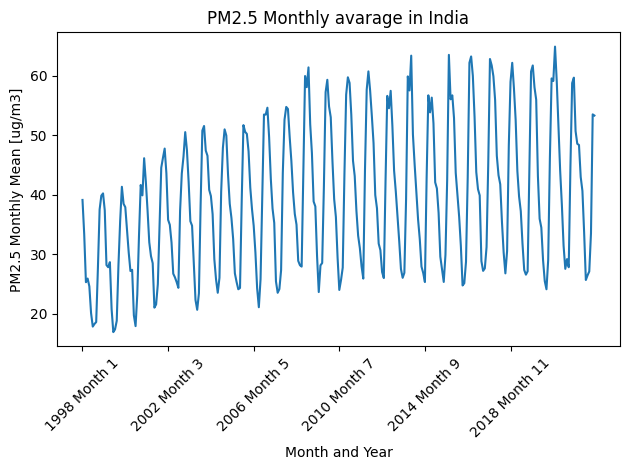

In [13]:
# Average of India for all the months
from matplotlib import pyplot as plt
import netCDF4
import numpy as np

step_size = 50
monthly_average = []
num_years = 25

for i in range(300):
    fp=f"formatted_monthly/{i}.nc"
    nc = netCDF4.Dataset(fp)
    avg = np.nanmean(nc.variables["GWRPM25"])
    monthly_average.append(avg)

def get_label_string(frame):
    return f"{1998 + int(frame/12)} Month {frame % 12 + 1}"

plt.plot(monthly_average)
plt.xticks(np.arange(0, num_years * 12, step_size), labels=[get_label_string(frame) for frame in range(0, num_years * 12, step_size)], rotation=45)
plt.title("PM2.5 Monthly avarage in India")
plt.ylabel("PM2.5 Monthly Mean [ug/m3]")
plt.xlabel("Month and Year")
plt.tight_layout()
plt.show()

## Yearly average PM2.5 in India
As you can see from below the yearly PM2.5 average.

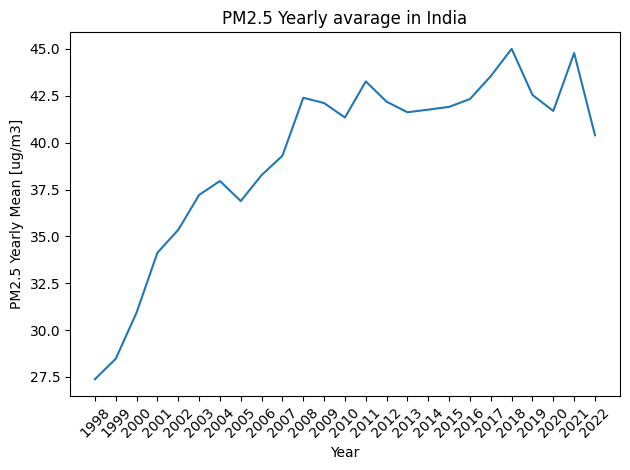

In [12]:
from matplotlib import pyplot as plt
import numpy as np

step_size = 1
yearly_average = [np.mean(monthly_average[i:i+12]) for i in range(0, num_years * 12, 12)]
plt.plot(yearly_average)
plt.xticks(np.arange(0, len(yearly_average), step_size), labels=[f"{1998 + frame}" for frame in range(0, len(yearly_average), step_size)], rotation=45)
plt.title("PM2.5 Yearly avarage in India")
plt.ylabel("PM2.5 Yearly Mean [ug/m3]")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

## Monthly average over the years
As you can see from the plot below the PM2.5 data is at the minimum in around Augest and reaches the maximum in around January and December 

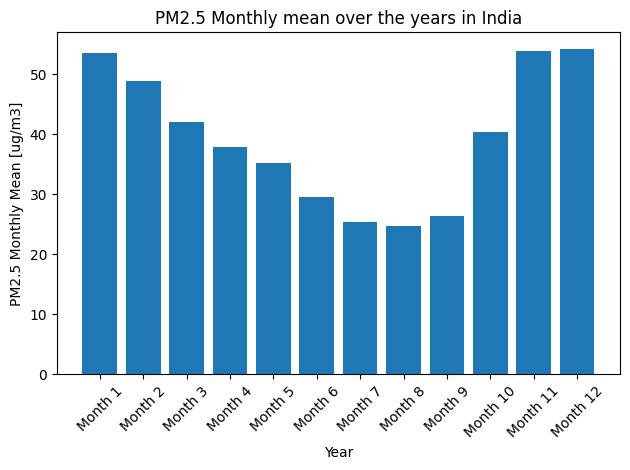

In [11]:
import numpy as np
from matplotlib import pyplot as plt

monthly_av_over_years = [np.mean(monthly_average[i::12]) for i in range(12)]
plt.bar([f"Month {frame + 1}" for frame in range(0, 12)], monthly_av_over_years)
plt.xticks(np.arange(0, 12, step_size), rotation=45)
plt.title("PM2.5 Monthly mean over the years in India")
plt.ylabel("PM2.5 Monthly Mean [ug/m3]")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

## Yearly Standard deviation of PM2.5 in India

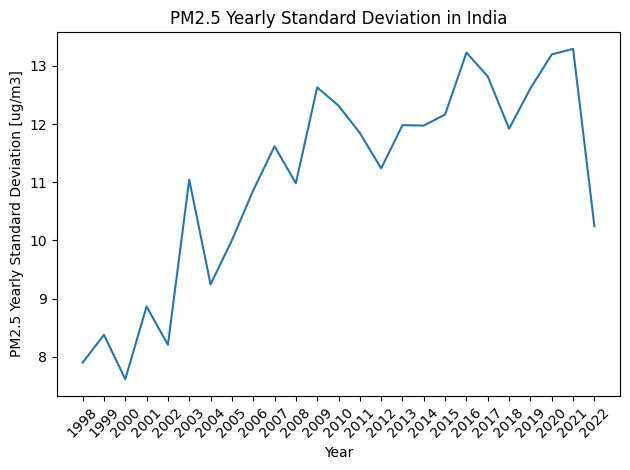

In [10]:
import numpy as np
from matplotlib import pyplot as plt

yearly_sd = [np.std(monthly_average[i:i+12]) for i in range(0, num_years * 12, 12)]
plt.figure()
plt.plot(yearly_sd)
plt.xticks(np.arange(0, num_years, step_size), labels=[f"{1998 + frame}" for frame in range(0, num_years, step_size)], rotation=45)
plt.title("PM2.5 Yearly Standard Deviation in India")
plt.ylabel("PM2.5 Yearly Standard Deviation [ug/m3]")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

## Regression


### Linear Regression
Here I have performed a regression over the monthly snapshot of India. However this doesn't give good results, because of the periodic nature of PM2.5 in India. Hence I have also performed a regression for each month seperatly.

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

step_size = 50

def print_error(err):
    df = pd.DataFrame([[f'Year {int(i/12) + 1998}, Month {i % 12 + 1}', elt] for i, elt in enumerate(err)], columns=["Time", "Error"])
    print(df.to_markdown())

def plot_error(err, title, ylabel):
    plt.figure()
    plt.plot(err)
    plt.xticks(np.arange(0, len(err), step_size), labels=[f"{1998 + int(frame / 12)} Month {frame % 12 + 1}" for frame in range(0, len(err), step_size)], rotation=45)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel("Year and Month")
    plt.tight_layout()
    plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
import numpy as np
import netCDF4
from matplotlib import pyplot as plt
from joblib import Parallel, delayed
import multiprocessing

all_data = np.array([netCDF4.Dataset(f"formatted_monthly/{i}.nc")["GWRPM25"] for i in range(300)])
lat = netCDF4.Dataset(f"formatted_monthly/{0}.nc")["lat"]
lon = netCDF4.Dataset(f"formatted_monthly/{0}.nc")["lon"]

error = np.zeros(300)
cnt = 0
def train_and_compute_error(i, j):
    if np.isnan(all_data[0, i, j]):
        return
    global cnt
    cnt += 1
    current_data = (np.array(list(enumerate(all_data[:, i, j]))))
    training_data_length = int(len(current_data) * 0.2)
    X = [[a] for a in (current_data[:training_data_length, 0])]
    y = [[a] for a in (current_data[:training_data_length, 1])]
    reg = LinearRegression().fit(X, y)
    predictions = reg.predict([[data_point] for data_point in np.arange(len(current_data))]).flatten()
    global error
    error += ((predictions - current_data[:, 1]) ** 2)
    
Parallel(n_jobs=multiprocessing.cpu_count(), require='sharedmem')(delayed(train_and_compute_error)(i, j) for i in range(len(lat)) for j in range(len(lon)))
error /= cnt
error = np.sqrt(error)
print_error(error)

|     | Time                |    Error |
|----:|:--------------------|---------:|
|   0 | Year 1998, Month 1  | 18.8846  |
|   1 | Year 1998, Month 2  | 10.4662  |
|   2 | Year 1998, Month 3  |  7.46604 |
|   3 | Year 1998, Month 4  |  6.3853  |
|   4 | Year 1998, Month 5  |  6.39752 |
|   5 | Year 1998, Month 6  | 11.486   |
|   6 | Year 1998, Month 7  | 13.8018  |
|   7 | Year 1998, Month 8  | 13.9136  |
|   8 | Year 1998, Month 9  | 13.7579  |
|   9 | Year 1998, Month 10 |  7.33568 |
|  10 | Year 1998, Month 11 | 18.3435  |
|  11 | Year 1998, Month 12 | 22.3858  |
|  12 | Year 1999, Month 1  | 19.7591  |
|  13 | Year 1999, Month 2  | 14.4864  |
|  14 | Year 1999, Month 3  | 11.937   |
|  15 | Year 1999, Month 4  |  7.47221 |
|  16 | Year 1999, Month 5  |  8.77492 |
|  17 | Year 1999, Month 6  | 13.7959  |
|  18 | Year 1999, Month 7  | 15.9227  |
|  19 | Year 1999, Month 8  | 16.0719  |
|  20 | Year 1999, Month 9  | 15.0139  |
|  21 | Year 1999, Month 10 |  8.76216 |
|  22 | Year 199

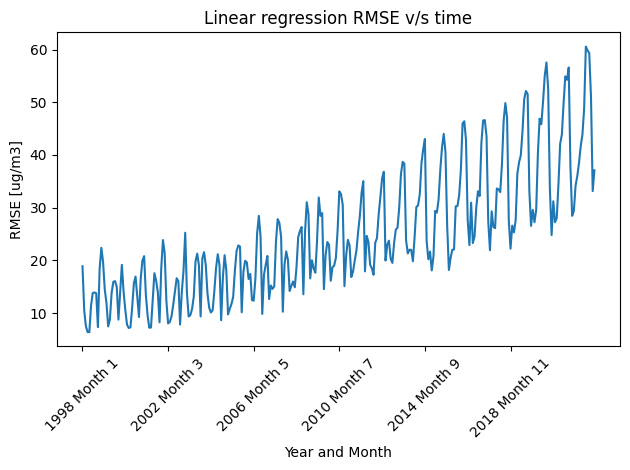

In [11]:
plot_error(error, "Linear regression RMSE v/s time", "RMSE [ug/m3]")

### Linear Regression (Monthly)
Here rergession is done only on top $12\degree$ latitudes of India.

In [14]:
from sklearn.linear_model import LinearRegression
import numpy as np
import netCDF4
from matplotlib import pyplot as plt
from joblib import Parallel, delayed
import multiprocessing

all_data = np.array([netCDF4.Dataset(f"formatted_monthly/{i}.nc")["GWRPM25"] for i in range(300)])
error = np.zeros(300)
cnt = 0

max_lat = 100

# 346188
def train_and_compute_error(month, i, j):
    if np.isnan(all_data[month, i, j]):
        return
    global cnt
    cnt += 1
    unshuffled_data = (np.array(list(enumerate(all_data[month::12, i, j]))))
    current_data = (np.array(list(enumerate(all_data[month::12, i, j]))))
    training_data_length = int(len(current_data) * 0.5)
    np.random.shuffle(current_data)
    X = [[a] for a in (current_data[:training_data_length, 0])]
    y = [[a] for a in (current_data[:training_data_length, 1])]
    reg = LinearRegression().fit(X, y)
    predictions = reg.predict([[data_point] for data_point in np.arange(len(current_data))]).flatten()
    # print(len(predictions))
    global error
    # error += ((predictions - current_data[:, 1]) ** 2)
    for i, e in enumerate(((predictions - unshuffled_data[:, 1]) ** 2)):
        error[12 * i + month] += e

# Parallel(n_jobs=multiprocessing.cpu_count(), require='sharedmem')(delayed(train_and_compute_error)(month, i, j) for i in range(len(lat)) for j in range(len(lon)) for month in range(12))
Parallel(n_jobs=multiprocessing.cpu_count(), require='sharedmem')(delayed(train_and_compute_error)(month, i, j) for i in range(max_lat) for j in range(len(lon)) for month in range(12))
error /= cnt/12
error = np.sqrt(error)
print_error(error)

|     | Time                |    Error |
|----:|:--------------------|---------:|
|   0 | Year 1998, Month 1  |  7.1893  |
|   1 | Year 1998, Month 2  |  7.73269 |
|   2 | Year 1998, Month 3  |  9.40709 |
|   3 | Year 1998, Month 4  |  7.25966 |
|   4 | Year 1998, Month 5  |  3.96759 |
|   5 | Year 1998, Month 6  |  2.70071 |
|   6 | Year 1998, Month 7  |  3.15543 |
|   7 | Year 1998, Month 8  |  3.44429 |
|   8 | Year 1998, Month 9  |  4.7472  |
|   9 | Year 1998, Month 10 |  7.95336 |
|  10 | Year 1998, Month 11 |  9.35357 |
|  11 | Year 1998, Month 12 |  5.25506 |
|  12 | Year 1999, Month 1  |  4.62789 |
|  13 | Year 1999, Month 2  |  5.60488 |
|  14 | Year 1999, Month 3  |  5.14373 |
|  15 | Year 1999, Month 4  |  5.69862 |
|  16 | Year 1999, Month 5  |  3.60469 |
|  17 | Year 1999, Month 6  |  2.93009 |
|  18 | Year 1999, Month 7  |  4.52212 |
|  19 | Year 1999, Month 8  |  3.96423 |
|  20 | Year 1999, Month 9  |  5.33595 |
|  21 | Year 1999, Month 10 |  9.37125 |
|  22 | Year 199

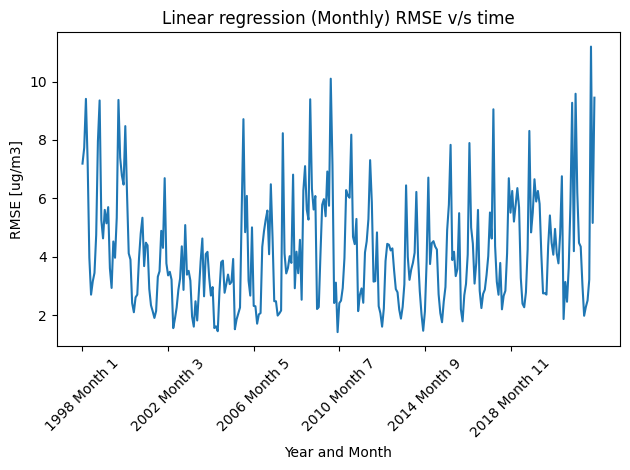

In [15]:
plot_error(error, "Linear regression (Monthly) RMSE v/s time", "RMSE [ug/m3]")

### Random Forest
Here regression is done only on 500 grids of India of area $0.1\degree \times 0.1\degree$

In [17]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import netCDF4
from matplotlib import pyplot as plt
from joblib import Parallel, delayed
import multiprocessing

all_data = np.array([netCDF4.Dataset(f"formatted_monthly/{i}.nc")["GWRPM25"] for i in range(300)])
error = np.zeros(300)
cnt = 0

max_grids = 500

def train_and_compute_error(i, j):
    if np.isnan(all_data[0, i, j]):
        return
    global cnt
    if cnt > max_grids:
        return
    cnt += 1
    unshuffled_data = (np.array(list(enumerate(all_data[:, i, j]))))
    current_data = (np.array(list(enumerate(all_data[:, i, j]))))
    training_data_length = int(len(current_data) * 0.2)
    np.random.shuffle(current_data)
    X = [[a] for a in (current_data[:training_data_length, 0])]
    # y = [[a] for a in (current_data[:training_data_length, 1])]
    # print(y)
    reg = RandomForestRegressor(max_depth=8, random_state=0).fit(X, current_data[:training_data_length, 1])
    predictions = reg.predict([[data_point] for data_point in np.arange(len(current_data))]).flatten()
    # print(len(predictions))
    global error
    error += ((predictions - unshuffled_data[:, 1]) ** 2)

Parallel(n_jobs=multiprocessing.cpu_count(), require='sharedmem')(delayed(train_and_compute_error)(i, j) for i in range(len(lat)) for j in range(len(lon)))
error /= cnt
error = np.sqrt(error)
print_error(error)

|     | Time                |    Error |
|----:|:--------------------|---------:|
|   0 | Year 1998, Month 1  |  4.75221 |
|   1 | Year 1998, Month 2  |  6.74248 |
|   2 | Year 1998, Month 3  |  5.16774 |
|   3 | Year 1998, Month 4  |  6.39241 |
|   4 | Year 1998, Month 5  |  4.56519 |
|   5 | Year 1998, Month 6  |  5.80557 |
|   6 | Year 1998, Month 7  |  4.90219 |
|   7 | Year 1998, Month 8  |  5.15626 |
|   8 | Year 1998, Month 9  |  5.20596 |
|   9 | Year 1998, Month 10 |  6.41589 |
|  10 | Year 1998, Month 11 |  5.14074 |
|  11 | Year 1998, Month 12 |  8.11173 |
|  12 | Year 1999, Month 1  | 12.5585  |
|  13 | Year 1999, Month 2  |  9.84954 |
|  14 | Year 1999, Month 3  |  7.88209 |
|  15 | Year 1999, Month 4  |  5.738   |
|  16 | Year 1999, Month 5  |  8.4197  |
|  17 | Year 1999, Month 6  |  7.60367 |
|  18 | Year 1999, Month 7  |  7.08898 |
|  19 | Year 1999, Month 8  |  5.84718 |
|  20 | Year 1999, Month 9  |  6.46113 |
|  21 | Year 1999, Month 10 |  7.62387 |
|  22 | Year 199

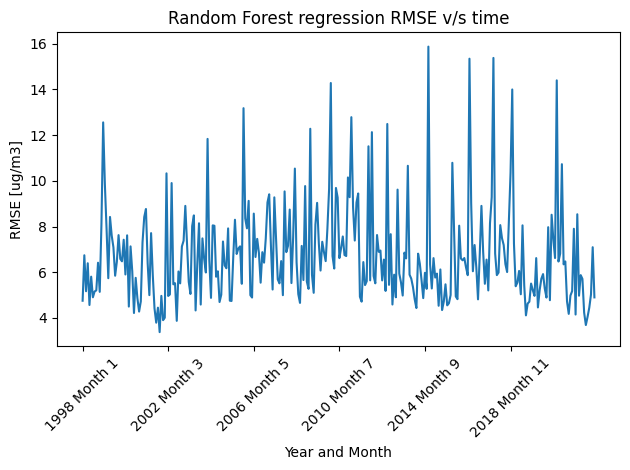

In [18]:
plot_error(error, "Random Forest regression RMSE v/s time", "RMSE [ug/m3]")

### K nearest neighbors

## References
1. Atmospheric Composition Analysis Group: https://sites.wustl.edu/acag/datasets/surface-pm2-5
2. Dataset: https://wustl.app.box.com/v/ACAG-V5GL04-GWRPM25c0p10/folder/237168822060
3. reverse_geocode: https://pypi.org/project/reverse-geocode/